In [3]:
import pandas as pd
from pandas_datareader import data
import numpy as np

import datetime

import matplotlib
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
today = enddate = datetime.date.today()
startdate = enddate - datetime.timedelta(days=240)# datetime.date(2006, 1, 1)
asset = 'AAPL'

In [5]:
# Spec: Stock data should be pulled from finance.yahoo
ticker = data.DataReader(asset, data_source='yahoo', start=startdate, end=enddate)
print(ticker.head())

# Add a new version of the date index for plotting
# convert the datetime64 column in the dataframe to 'float days'
ticker['NumDate'] = mdates.date2num(ticker.index.to_pydatetime())

                 Open        High        Low       Close    Volume  Adj Close
Date                                                                         
2016-05-24  97.220001   98.089996  96.839996   97.900002  35140200  96.875137
2016-05-25  98.669998   99.739998  98.110001   99.620003  38168800  98.577132
2016-05-26  99.680000  100.730003  98.639999  100.410004  56331200  99.358863
2016-05-27  99.440002  100.470001  99.250000  100.349998  36229500  99.299486
2016-05-31  99.599998  100.400002  98.820000   99.860001  42307200  98.814618


In [6]:
ticker.tail()

,Open,High,Low,Close,Volume,Adj Close,NumDate
Date,,,,,,,
2017-01-11,118.739998,119.930000,118.599998,119.750000,27418600,119.750000,736340
2017-01-12,118.900002,119.300003,118.209999,119.250000,27002400,119.250000,736341
2017-01-13,119.110001,119.620003,118.809998,119.040001,25938300,119.040001,736342
2017-01-17,118.339996,120.239998,118.220001,120.000000,34078600,120.000000,736346
2017-01-18,120.000000,120.500000,119.709999,119.989998,23644700,119.989998,736347


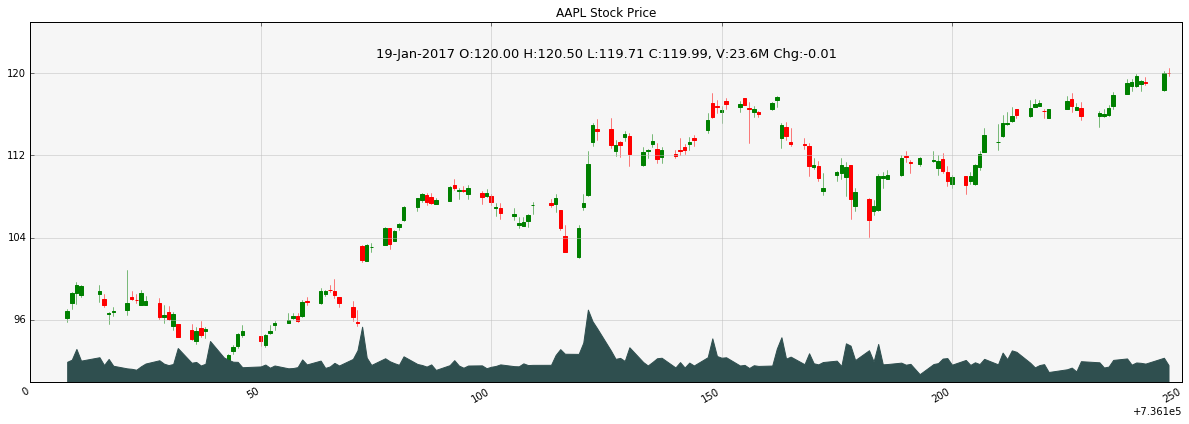

In [7]:
# First we plot our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
# rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
# ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t: # , ax3 #ax1, 
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
# ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [18]:
# Spec: Each step in calculations of the technical indicators should be explicitly shown
# Define the indicator using functions:

# ADX: http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_directional_index_adx
# 1. Calculate the True Range (TR), Plus Directional Movement (+DM) and Minus Directional Movement (-DM) for each period.
# 2. Smooth these periodic values using the Wilder's smoothing techniques. These are explained in detail in the next section.
    # Wilder’s Smoothing and the EMA are actually the same indicator.  To reveal the equivalent EMA simply multiply the period by two and subtract one, test it for yourself; a 50 period WS-MA is equivalent to a 99 period EMA.
# 3. Divide the 14-day smoothed Plus Directional Movement (+DM) by the 14-day smoothed True Range to find the 14-day Plus Directional Indicator (+DI14). Multiply by 100 to move the decimal point two places. This +DI14 is the Plus Directional Indicator (green line) that is plotted along with ADX.
# 4. Divide the 14-day smoothed Minus Directional Movement (-DM) by the 14-day smoothed True Range to find the 14-day Minus Directional Indicator (-DI14). Multiply by 100 to move the decimal point two places. This -DI14 is the Minus Directional Indicator (red line) that is plotted along with ADX.
# 5. The Directional Movement Index (DX) equals the absolute value of +DI14 less - DI14 divided by the sum of +DI14 and - DI14. Multiply the result by 100 to move the decimal point over two places.
# 6. After all these steps, it is time to calculate the Average Directional Index (ADX). The first ADX value is simply a 14-day average of DX. Subsequent ADX values are smoothed by multiplying the previous 14-day ADX value by 13, adding the most recent DX value and dividing this total by 14.

def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.

    type is 'simple' | 'exponential'

    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a

def wilder_sum(s, n):
    s = s.dropna()

    nf = (n - 1) / n
    ws = [np.nan]*(n - 1) + [s[n - 1] + nf*sum(s[:n - 1])]

    for v in s[n:]:
        ws.append(v + ws[-1]*nf)

    return pd.Series(ws, index=s.index)

def true_range(ticker):
    # Max of:
        # high-low
        # abs(high-previous close)
        # abs(low-previous close)
    # ticker['High']-ticker['Low']
    # abs(ticker["High"] - ticker.shift(periods=1)["Close"])
    # abs(ticker["Low"] - ticker.shift(periods=1)["Close"])
    true_range = pd.concat([ticker['High']-ticker['Low'],
             abs(ticker["High"] - ticker.shift(periods=1)["Close"]),
             abs(ticker["Low"] - ticker.shift(periods=1)["Close"])
            ], axis=1).apply( max, axis=1 )
    return true_range

def plus_directional_movement(ticker):
    # If today's high - yesterdays high > yesterday's low - today's low
        # PDM = max(today's high - yesterdays high, 0)
    # Else: 0
    PDM = ((ticker["High"] - ticker.shift(periods=1)["High"]) > (ticker.shift(periods=1)["Low"] - ticker["Low"])) * (ticker["High"] - ticker.shift(periods=1)["High"])
    PDM = abs(PDM * (PDM > 0))
    return PDM

def minus_directional_movement(ticker):
    # If yesterday's low - today's low > today's high - yesterdays high
        # MDM = max(yesterday's low - today's low,0)
    # Else: 0
    MDM = ((ticker.shift(periods=1)["Low"] - ticker["Low"]) > (ticker["High"] - ticker.shift(periods=1)["High"])) * (ticker.shift(periods=1)["Low"] - ticker["Low"])
    MDM = abs(MDM * (MDM > 0))
    return MDM

def smoothed_true_range(ticker, n=14):
    # EMA of TR
    # STR = moving_average(ticker["TR"], n, type='exponential')
    STR = wilder_sum(ticker["TR"], n)
    return STR

def smoothed_plus_directional_movement(ticker, n=14):
    # EMA of PDM
    # SPDM = moving_average(ticker["PDM"], n, type='exponential')
    SPDM = wilder_sum(ticker["PDM"], n)
    return SPDM

def smoothed_minus_directional_movement(ticker, n=14):
    # EMA of MDM
    # SMDM = moving_average(ticker["MDM"], n, type='exponential')
    SMDM = wilder_sum(ticker["MDM"], n)
    return SMDM

def plus_directional_indicator(ticker):
    PDI = 100 * ticker["SPDM"]/ticker["STR"]
    return PDI

def minus_directional_indicator(ticker):
    MDI = 100 * ticker["SMDM"]/ticker["STR"]
    return MDI

def directional_movement_index(ticker):
    DX = 100 * abs(ticker["PDI"] - ticker["MDI"]) / (ticker["PDI"] + ticker["MDI"])
    return DX

def average_directional_index(ticker, n=14):
    ADX = moving_average(ticker["DX"], n, type='exponential')
    return ADX


In [19]:
ticker.head()

,Open,High,Low,Close,Volume,Adj Close,NumDate,TR,PDM,MDM,STR,SPDM
Date,,,,,,,,,,,,
2016-05-24,97.220001,98.089996,96.839996,97.900002,35140200,96.875137,736108,1.250000,NaN,NaN,NaN,NaN
2016-05-25,98.669998,99.739998,98.110001,99.620003,38168800,98.577132,736109,1.839996,1.650002,0.00,NaN,NaN
2016-05-26,99.680000,100.730003,98.639999,100.410004,56331200,99.358863,736110,2.090004,0.990005,0.00,NaN,NaN
2016-05-27,99.440002,100.470001,99.250000,100.349998,36229500,99.299486,736111,1.220001,0.000000,0.00,NaN,NaN
2016-05-31,99.599998,100.400002,98.820000,99.860001,42307200,98.814618,736115,1.580002,0.000000,0.43,NaN,NaN


In [20]:
# Spec: Each calculation should be manifested in Pandas dataframes
# Define the indicator parameters for simulation
n = 14
key_level = 20

# Compute the indicator values (intermediate and final)
# Add indicator values to DataFrame
ticker["TR"] = true_range(ticker)
ticker["PDM"] = plus_directional_movement(ticker)
ticker["MDM"] = minus_directional_movement(ticker)

ticker["STR"] = smoothed_true_range(ticker, n=n)
ticker["SPDM"] = smoothed_plus_directional_movement(ticker, n=n)
ticker["SMDM"] = smoothed_minus_directional_movement(ticker, n=n)

ticker["PDI"] = plus_directional_indicator(ticker)
ticker["MDI"] = minus_directional_indicator(ticker)

ticker["DX"] = directional_movement_index(ticker)

ticker["ADX"] = average_directional_index(ticker, n=n)

ticker.tail()

,Open,High,Low,Close,Volume,Adj Close,NumDate,TR,PDM,MDM,STR,SPDM,SMDM,PDI,MDI,DX,ADX
Date,,,,,,,,,,,,,,,,,
2017-01-11,118.739998,119.930000,118.599998,119.750000,27418600,119.750000,736340,1.330002,0.550003,0.000000,20.241880,6.120593,2.901477,30.237275,14.334030,35.680455,20.286039
2017-01-12,118.900002,119.300003,118.209999,119.250000,27002400,119.250000,736341,1.540001,0.000000,0.389999,20.336033,5.683408,3.084228,27.947475,15.166320,29.645163,19.243750
2017-01-13,119.110001,119.620003,118.809998,119.040001,25938300,119.040001,736342,0.810005,0.320000,0.000000,19.693464,5.597450,2.863926,28.422882,14.542520,32.305906,20.030015
2017-01-17,118.339996,120.239998,118.220001,120.000000,34078600,120.000000,736346,2.019997,0.619995,0.000000,20.306785,5.817627,2.659360,28.648687,13.095917,37.256958,21.158816
2017-01-18,120.000000,120.500000,119.709999,119.989998,23644700,119.989998,736347,0.790001,0.260002,0.000000,19.646301,5.662084,2.469405,28.820104,12.569315,39.263148,21.174108


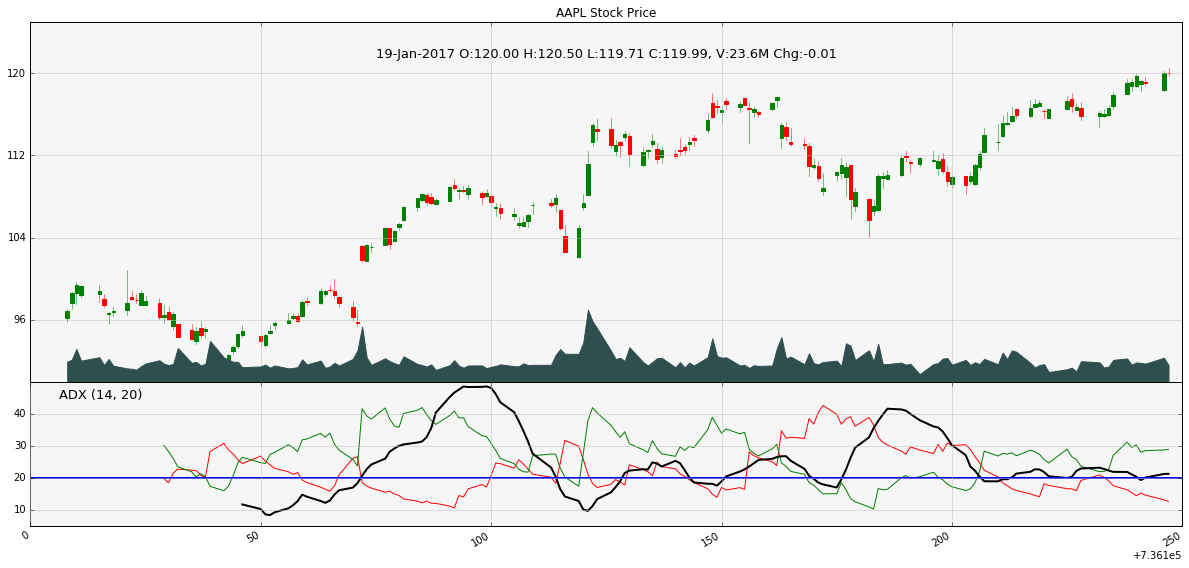

In [21]:
# Next we plot the indicator against our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# Plot the indicator
ax3.plot(ticker["NumDate"], ticker["MDI"], color='red', lw=1)
ax3.plot(ticker["NumDate"], ticker["PDI"], color='green', lw=1)
ax3.plot(ticker["NumDate"], ticker["ADX"], color='black', lw=2) 
ax3.axhline(y=key_level, color='blue', lw=2)


ax3.text(0.025, 0.95, 'ADX (%d, %d)' % (n, key_level), va='top',
         transform=ax3.transAxes, fontsize=textsize)

# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [22]:
# Here we will define the strategy to be tested: long-only ADX
# The strategy is composed of:
#    Outlook: whether the market is bullish, bearish, or neutral
#    Signal: the order to buy or sell

# Spec: Each indicator should have a bullish and bearish entry and exit rules clearly defined
# Define how signals are calculated
def define_outlook(ticker):
    # Default to Hold signal (other options are Buy or Sell)
    ticker["Outlook"] = "Neutral"
    # For now, signal on every crossover. Could be more specific if preferred
    ticker.loc[(ticker["ADX"]>25) & (ticker["PDI"]>ticker["MDI"]),"Outlook"] = "Bull"
    ticker.loc[(ticker["ADX"]>25) & (ticker["PDI"]<ticker["MDI"]),"Outlook"] = "Bear"
    
    # Shift the signal by 1 day to avoid look-ahead bias
    ticker.loc[:,"Outlook"] = ticker["Outlook"].shift().fillna("Neutral")
    
    return ticker

# Define how outlook is turned into trade recommendations
def define_signal(ticker):
    # Recode Bull=1, Bear=-1, Neutral=0
    outlook_temp = ticker["Outlook"].replace("Bull",1)
    outlook_temp = outlook_temp.replace("Bear",-1)
    outlook_temp = outlook_temp.replace("Neutral",0)
    trades = outlook_temp.diff().fillna(0)
    # define how trades should happen based on the signal given
    ticker.loc[trades > 0,"Trade"] = "Buy"
    ticker.loc[trades < 0, "Trade"] = "Sell"
    ticker["Trade"] = ticker["Trade"].fillna("Hold")
    return ticker
    
    
# Translate indicator values into bullish/bearish signals
ticker = define_outlook(ticker)
ticker = define_signal(ticker)

ticker.head()

,Open,High,Low,Close,Volume,Adj Close,NumDate,TR,PDM,MDM,STR,SPDM,SMDM,PDI,MDI,DX,ADX,Outlook,Trade
Date,,,,,,,,,,,,,,,,,,,
2016-05-24,97.220001,98.089996,96.839996,97.900002,35140200,96.875137,736108,1.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Hold
2016-05-25,98.669998,99.739998,98.110001,99.620003,38168800,98.577132,736109,1.839996,1.650002,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Hold
2016-05-26,99.680000,100.730003,98.639999,100.410004,56331200,99.358863,736110,2.090004,0.990005,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Hold
2016-05-27,99.440002,100.470001,99.250000,100.349998,36229500,99.299486,736111,1.220001,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Hold
2016-05-31,99.599998,100.400002,98.820000,99.860001,42307200,98.814618,736115,1.580002,0.000000,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Hold


In [23]:
# And finanlly we test the strategy's performance

# Spec: The trading strategy
#    - the starting capital is $100K
#    - Once the indicator flashes a buy signal, the entire capital is invested into the stock
#    - Once the indicator gets into a sell mode, the trade is exited
#    - No transaction fee assumption applies
starting_capital = 100000
# Currently assuming everything is long-only
long_only = True
# Have to use Adjusted Close for accounting due to splits
returns = pd.DataFrame({"Price":ticker["Adj Close"],
                       "Outlook":ticker["Outlook"],
                        "Trade":ticker["Trade"]
                       })


returns["Asset"] = 0
returns.loc[returns["Trade"]=="Buy","Asset"] = 1
returns.loc[returns["Trade"]=="Hold","Asset"] = np.nan
returns["Asset"] = returns["Asset"].ffill().fillna(0)


returns.loc[(returns["Trade"] == "Buy") & (returns["Asset"].shift() == 0), "Trade_Type"] = "Entry"
returns.loc[(returns["Trade"] == "Sell") & (returns["Asset"].shift() == 1), "Trade_Type"] = "Exit"
# Also will introduce short and cover when shorting is introduced

returns["Asset_Returns"] = returns["Price"].pct_change().fillna(0)
returns["Portfolio_Returns"] = returns["Asset_Returns"] * returns["Asset"]
returns["Portfolio_Value"] = starting_capital * returns["Portfolio_Returns"].cumsum()
returns["Buy_And_Hold"] = starting_capital * returns["Asset_Returns"].cumsum()
returns.tail()

,Outlook,Price,Trade,Asset,Trade_Type,Asset_Returns,Portfolio_Returns,Portfolio_Value,Buy_And_Hold
Date,,,,,,,,,
2017-01-11,Neutral,119.750000,Hold,1,NaN,0.005373,0.005373,4107.124942,22301.294354
2017-01-12,Neutral,119.250000,Hold,1,NaN,-0.004175,-0.004175,3689.588408,21883.757820
2017-01-13,Neutral,119.040001,Hold,1,NaN,-0.001761,-0.001761,3513.488617,21707.658029
2017-01-17,Neutral,120.000000,Hold,1,NaN,0.008065,0.008065,4319.939383,22514.108795
2017-01-18,Neutral,119.989998,Hold,1,NaN,-0.000083,-0.000083,4311.604383,22505.773795


In [24]:
##### Spec: Each notebook should calculate and show the following performance indicators
#    - Total Return (e.g., Total Return is 89%)
total_return = returns["Portfolio_Returns"].cumsum()[-1]
print("Total Return: "+str(round(total_return*100,2))+"%")
#    - Annual returns (e.g., 2011 Return is 24%, 2012 Return is 14%, etc)
annual_returns = pd.DataFrame(returns["Portfolio_Returns"].groupby([lambda x: x.year]).sum())
print(annual_returns.to_string(formatters={'Portfolio_Returns': '{:,.2%}'.format}))
# Create trade log table
# Ignores final trade if it hasn't been closed out yet
exits = returns[returns["Trade_Type"].isin(["Exit"])]
entries = returns[returns["Trade_Type"].isin(["Entry"])]
entries = entries[0:len(exits)]
trade_log = pd.DataFrame({"Outlook":entries["Outlook"].tolist(),
                          "Entry_Price":entries["Price"].tolist(),
                          "Entry_Date":entries.index.to_pydatetime(),
                          "Exit_Price":exits["Price"].tolist(),
                          "Exit_Date":exits.index.to_pydatetime()
                      })
#    - Total number of bullish and bearish trades
total_bull = sum(trade_log["Outlook"] == "Bull")
total_bear = sum(trade_log["Outlook"] == "Bear") # Has to be 0 because this is a long-only strategy
#    - Total number of bullish and bearish wins
#    - Total number of bullish and bearish losses
bull_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bull"))
bull_losses = total_bull - bull_wins
bear_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bear")) # Must be 0 because this is a long-only strategy
bear_losses = total_bear - bear_wins
if not long_only:
    print("Bull Trades (W/L): "+str(total_bull)+" ("+
      str(bull_wins)+"/"+str(bull_losses)+")")
    print("Bear Trades (W/L): "+str(total_bear)+" ("+
      str(bear_wins)+"/"+str(bear_losses)+")")
#    - Win ratio
# Also including total wins and losses
total_trades = len(trade_log)
total_wins = sum(trade_log["Exit_Price"] > trade_log["Entry_Price"])
total_losses = total_trades - total_wins


if total_losses > 0:
    win_ratio = (total_wins) / (total_losses)
else:
    win_ratio = 1000000
print("Win Ratio: "+str(total_wins)+
      ":"+str(total_losses)+" ("+str(round(win_ratio,2))+")")
#    - Maximum drawdown
def max_drawdown_absolute(returns):
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.argmin()
    start = r.loc[:end].argmax()
    return mdd, start, end

max_drawdown = max_drawdown_absolute(returns["Portfolio_Returns"])[0]
print("Max Drawdown: "+str(round(max_drawdown*100,2))+"%")

#    - Sharpe ratio
trading_days = 252
daily_returns = returns["Portfolio_Returns"]
sharpe_ratio = np.sqrt(trading_days) * daily_returns.mean() / daily_returns.std()
print("Sharpe Ratio: "+str(round(sharpe_ratio*100,2))+"%")

Total Return: 4.31%
     Portfolio_Returns
2016             0.76%
2017             3.55%
Win Ratio: 3:2 (1.5)
Max Drawdown: -8.05%
Sharpe Ratio: 77.32%


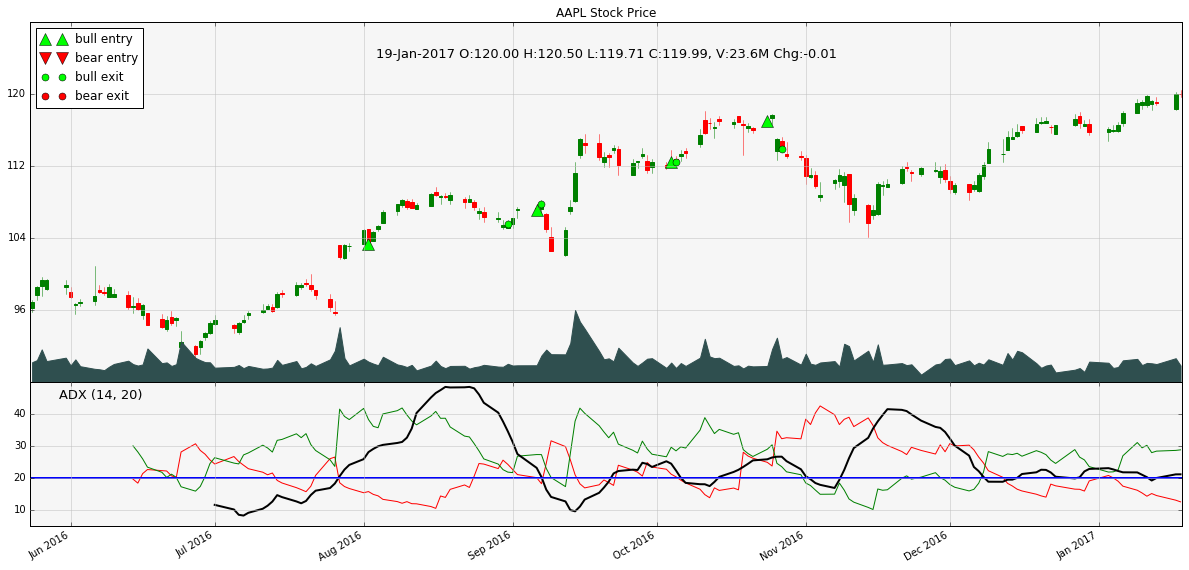

In [25]:
# Spec: And have the following 2 charts
#    - Stock chart with each bullish and bearish trade entry and exit points


plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# Plot the indicator
ax3.plot(ticker["NumDate"], ticker["MDI"], color='red', lw=1)
ax3.plot(ticker["NumDate"], ticker["PDI"], color='green', lw=1)
ax3.plot(ticker["NumDate"], ticker["ADX"], color='black', lw=2) 
ax3.axhline(y=key_level, color='blue', lw=2)

ax3.text(0.025, 0.95, 'ADX (%d, %d)' % (n, key_level), va='top',
         transform=ax3.transAxes, fontsize=textsize)

# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

bull_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bull"].set_index("Entry_Date")
bear_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bear"].set_index("Entry_Date")

bull_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bull"].set_index("Exit_Date")
bear_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bear"].set_index("Exit_Date")

ax2.plot(bull_entry.index, bull_entry.values, '^', color='lime', markersize=12,
                   label='bull entry')
ax2.plot(bear_entry.index, bear_entry.values, 'v', color='red', markersize=12,
                   label='bear entry')
ax2.plot(bull_exit.index, bull_exit.values, 'o', color='lime', markersize=7,
                   label='bull exit')
ax2.plot(bear_exit.index, bear_exit.values, 'o', color='red', markersize=7,
                   label='bear exit')

ax2.legend(loc="best")

plt.show()

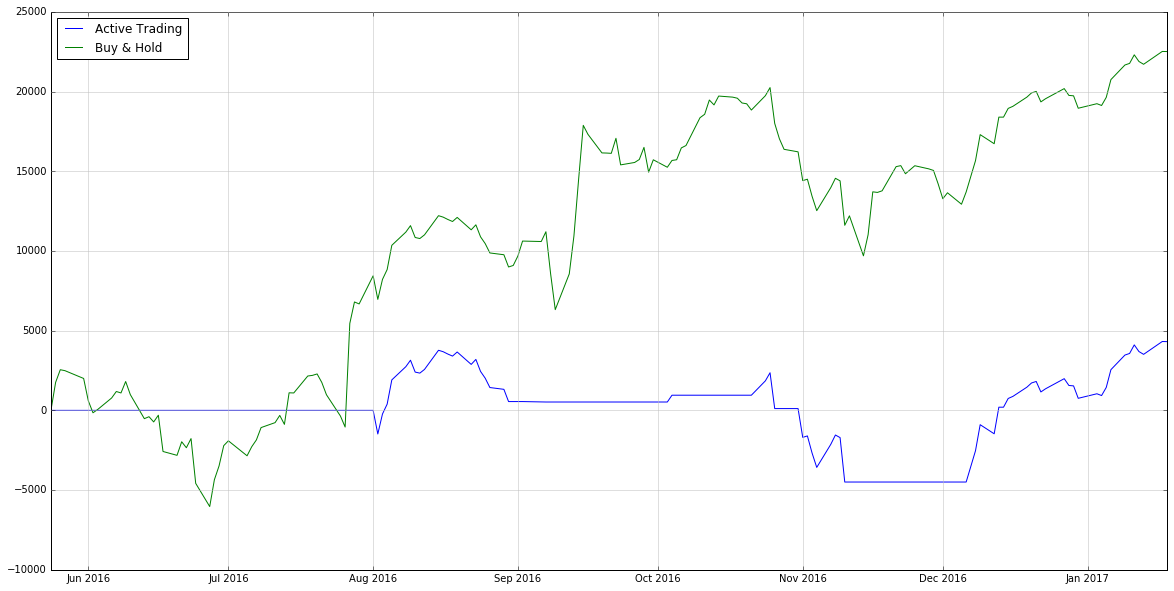

In [26]:
#    - Equity curve for the strategy compared to buy and hold strategy
plt.plot(returns["Portfolio_Value"], label='Active Trading')
plt.plot(returns["Buy_And_Hold"], label='Buy & Hold')
plt.legend(loc="upper left")
plt.show()